<a href="https://colab.research.google.com/github/compile1-bit/Rossmann_sales_prediction/blob/main/Rossamnn_XGBoost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
!pip install opendatasets numpy pandas matplotlib seaborn --quiet

###  Data Loading and Inspection

In [7]:
!pip install jovian xgboost graphviz lightgbm scikit-learn --quiet
!pip install opendatasets numpy pandas matplotlib seaborn --quiet

In [8]:
import pandas as pd
import numpy as np
import opendatasets as od
import os
import matplotlib.pyplot as plt
pd.set_option('display.max_columns',120)
pd.set_option('display.max_rows',120)
%matplotlib inline

In [9]:
ross_df = pd.read_csv('/content/train_v2.csv')
test_df = pd.read_csv('/content/test_v2.csv')
store_df = pd.read_csv('/content/store.csv')
submission_df = pd.read_csv('/content/sample_submission.csv')

/tmp/ipython-input-4087207519.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  ross_df = pd.read_csv('/content/train_v2.csv')


In [10]:
ross_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-01-30,5577,616,1,1,0,0
1,2,5,2015-01-30,5919,624,1,1,0,0
2,3,5,2015-01-30,6911,678,1,1,0,0
3,4,5,2015-01-30,13307,1632,1,1,0,0
4,5,5,2015-01-30,5640,617,1,1,0,0
...,...,...,...,...,...,...,...,...,...
66895,864,3,2014-11-26,5156,626,1,1,0,0
66896,865,3,2014-11-26,9337,646,1,1,0,0
66897,866,3,2014-11-26,7973,479,1,1,0,0
66898,867,3,2014-11-26,5391,440,1,1,0,0


In [11]:
test_df

,Store,DayOfWeek,Date,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,555,1,1,0,1
1,2,5,2015-07-31,625,1,1,0,1
2,3,5,2015-07-31,821,1,1,0,1
3,4,5,2015-07-31,1498,1,1,0,1
4,5,5,2015-07-31,559,1,1,0,1
...,...,...,...,...,...,...,...,...
33445,1111,4,2015-07-02,329,1,1,0,1
33446,1112,4,2015-07-02,577,1,1,0,1
33447,1113,4,2015-07-02,793,1,1,0,0
33448,1114,4,2015-07-02,3784,1,1,0,0


In [12]:
store_df

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [13]:
submission_df

,Id,Sales
0,1,1
1,2,1
2,3,1
3,4,1
4,5,1
...,...,...
41083,41084,1
41084,41085,1
41085,41086,1
41086,41087,1


### Data Merging

In [14]:

merged_df = pd.merge(ross_df,store_df, on = 'Store', how = 'left')
merged_test_df = pd.merge(test_df,store_df, on = 'Store', how = 'left')

In [15]:
merged_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-01-30,5577,616,1,1,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-01-30,5919,624,1,1,0,0,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-01-30,6911,678,1,1,0,0,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-01-30,13307,1632,1,1,0,0,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-01-30,5640,617,1,1,0,0,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66895,864,3,2014-11-26,5156,626,1,1,0,0,a,a,1020.0,10.0,2012.0,1,45.0,2009.0,"Feb,May,Aug,Nov"
66896,865,3,2014-11-26,9337,646,1,1,0,0,d,c,2640.0,NaN,NaN,0,NaN,NaN,NaN
66897,866,3,2014-11-26,7973,479,1,1,0,0,d,a,9680.0,NaN,NaN,1,5.0,2013.0,"Feb,May,Aug,Nov"
66898,867,3,2014-11-26,5391,440,1,1,0,0,d,c,21810.0,9.0,2012.0,0,NaN,NaN,NaN


In [16]:
merged_test_df

,Store,DayOfWeek,Date,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33445,1111,4,2015-07-02,329,1,1,0,1,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
33446,1112,4,2015-07-02,577,1,1,0,1,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
33447,1113,4,2015-07-02,793,1,1,0,0,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
33448,1114,4,2015-07-02,3784,1,1,0,0,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


### Feature Engineering: Date Features

In [17]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66900 entries, 0 to 66899
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      66900 non-null  int64  
 1   DayOfWeek                  66900 non-null  int64  
 2   Date                       66900 non-null  object 
 3   Sales                      66900 non-null  int64  
 4   Customers                  66900 non-null  int64  
 5   Open                       66900 non-null  int64  
 6   Promo                      66900 non-null  int64  
 7   StateHoliday               66900 non-null  object 
 8   SchoolHoliday              66900 non-null  int64  
 9   StoreType                  66900 non-null  object 
 10  Assortment                 66900 non-null  object 
 11  CompetitionDistance        66738 non-null  float64
 12  CompetitionOpenSinceMonth  45588 non-null  float64
 13  CompetitionOpenSinceYear   45588 non-null  flo

In [18]:
def split_date(df):
  df['Date'] = pd.to_datetime(merged_df['Date'])
  df['Year' ] = df.Date.dt.year
  df['Month'] = df.Date.dt.month
  df['Day'] = df.Date.dt.day
  df['WeekOfYear'] = df.Date.dt.isocalendar().week
  return df

In [19]:
split_date(merged_df)


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day,WeekOfYear
0,1,5,2015-01-30,5577,616,1,1,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2015,1,30,5
1,2,5,2015-01-30,5919,624,1,1,0,0,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,1,30,5
2,3,5,2015-01-30,6911,678,1,1,0,0,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,1,30,5
3,4,5,2015-01-30,13307,1632,1,1,0,0,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN,2015,1,30,5
4,5,5,2015-01-30,5640,617,1,1,0,0,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN,2015,1,30,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66895,864,3,2014-11-26,5156,626,1,1,0,0,a,a,1020.0,10.0,2012.0,1,45.0,2009.0,"Feb,May,Aug,Nov",2014,11,26,48
66896,865,3,2014-11-26,9337,646,1,1,0,0,d,c,2640.0,NaN,NaN,0,NaN,NaN,NaN,2014,11,26,48
66897,866,3,2014-11-26,7973,479,1,1,0,0,d,a,9680.0,NaN,NaN,1,5.0,2013.0,"Feb,May,Aug,Nov",2014,11,26,48
66898,867,3,2014-11-26,5391,440,1,1,0,0,d,c,21810.0,9.0,2012.0,0,NaN,NaN,NaN,2014,11,26,48


In [20]:
split_date(merged_test_df)

,Store,DayOfWeek,Date,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day,WeekOfYear
0,1,5,2015-01-30,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2015,1,30,5
1,2,5,2015-01-30,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,1,30,5
2,3,5,2015-01-30,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,1,30,5
3,4,5,2015-01-30,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN,2015,1,30,5
4,5,5,2015-01-30,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN,2015,1,30,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33445,1111,4,2015-01-01,329,1,1,0,1,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct",2015,1,1,1
33446,1112,4,2015-01-01,577,1,1,0,1,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN,2015,1,1,1
33447,1113,4,2015-01-01,793,1,1,0,0,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN,2015,1,1,1
33448,1114,4,2015-01-01,3784,1,1,0,0,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN,2015,1,1,1


In [21]:
merged_df[merged_df.Open == 0].Sales.value_counts()

,count
Sales,
0,12212


In [22]:
merged_df = merged_df[merged_df.Open == 1] .copy()



### Feature Engineering: Competition and Promotion Features



In [23]:
def com_month(df):
  df['CompetetionOpen'] = 12 *(df.Year - df.CompetitionOpenSinceYear) + (df.Month - df.CompetitionOpenSinceMonth)
  df['CompetetionOpen'] = df['CompetetionOpen'].map(lambda x: 0 if x < 0 else x).fillna(0)

In [24]:
com_month(merged_df)

In [25]:
com_month(merged_test_df)

In [26]:
merged_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day,WeekOfYear,CompetetionOpen
0,1,5,2015-01-30,5577,616,1,1,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2015,1,30,5,76.0
1,2,5,2015-01-30,5919,624,1,1,0,0,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,1,30,5,86.0
2,3,5,2015-01-30,6911,678,1,1,0,0,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,1,30,5,97.0
3,4,5,2015-01-30,13307,1632,1,1,0,0,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN,2015,1,30,5,64.0
4,5,5,2015-01-30,5640,617,1,1,0,0,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN,2015,1,30,5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66895,864,3,2014-11-26,5156,626,1,1,0,0,a,a,1020.0,10.0,2012.0,1,45.0,2009.0,"Feb,May,Aug,Nov",2014,11,26,48,25.0
66896,865,3,2014-11-26,9337,646,1,1,0,0,d,c,2640.0,NaN,NaN,0,NaN,NaN,NaN,2014,11,26,48,0.0
66897,866,3,2014-11-26,7973,479,1,1,0,0,d,a,9680.0,NaN,NaN,1,5.0,2013.0,"Feb,May,Aug,Nov",2014,11,26,48,0.0
66898,867,3,2014-11-26,5391,440,1,1,0,0,d,c,21810.0,9.0,2012.0,0,NaN,NaN,NaN,2014,11,26,48,26.0


### Data Preparation for Modeling


In [27]:
def check_promo_month(row):
  month2str = {
      1: 'Jan',2: 'Feb',3: 'Mar',4: 'Apr',5: 'May',6: 'Jun',7: 'Jul',
      8: 'Aug',9: 'Sep',10: 'Oct',11: 'Nov',12: 'Dec'}
  try:
    months = (row['PromoInterval'] or '').split(',')
    if row['Prom2Open'] and month2str[row['Month']] in months:
      return 1
    else:
      return 0
  except Exception:
    return 0
def promo_cols(df):
  df['Prom2Open'] = 12 * (df.Year - df.Promo2SinceYear) + (df.WeekOfYear - df.Promo2SinceWeek)*12
  df['Prom2Open'] = df['Prom2Open'].map(lambda x: 0 if x < 0 else x).fillna(0) * df['Promo2']
  df['IsPromoMonth'] = df.apply(lambda row: check_promo_month(row), axis = 1)

In [28]:
promo_cols(merged_df)

In [29]:
promo_cols(merged_test_df)

In [30]:
merged_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day,WeekOfYear,CompetetionOpen,Prom2Open,IsPromoMonth
0,1,5,2015-01-30,5577,616,1,1,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2015,1,30,5,76.0,0.0,0
1,2,5,2015-01-30,5919,624,1,1,0,0,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,1,30,5,86.0,0.0,0
2,3,5,2015-01-30,6911,678,1,1,0,0,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,1,30,5,97.0,0.0,0
3,4,5,2015-01-30,13307,1632,1,1,0,0,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN,2015,1,30,5,64.0,0.0,0
4,5,5,2015-01-30,5640,617,1,1,0,0,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN,2015,1,30,5,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66895,864,3,2014-11-26,5156,626,1,1,0,0,a,a,1020.0,10.0,2012.0,1,45.0,2009.0,"Feb,May,Aug,Nov",2014,11,26,48,25.0,96.0,1
66896,865,3,2014-11-26,9337,646,1,1,0,0,d,c,2640.0,NaN,NaN,0,NaN,NaN,NaN,2014,11,26,48,0.0,0.0,0
66897,866,3,2014-11-26,7973,479,1,1,0,0,d,a,9680.0,NaN,NaN,1,5.0,2013.0,"Feb,May,Aug,Nov",2014,11,26,48,0.0,528.0,1
66898,867,3,2014-11-26,5391,440,1,1,0,0,d,c,21810.0,9.0,2012.0,0,NaN,NaN,NaN,2014,11,26,48,26.0,0.0,0


In [31]:
merged_test_df

,Store,DayOfWeek,Date,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day,WeekOfYear,CompetetionOpen,Prom2Open,IsPromoMonth
0,1,5,2015-01-30,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2015,1,30,5,76.0,0.0,0
1,2,5,2015-01-30,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,1,30,5,86.0,0.0,0
2,3,5,2015-01-30,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,1,30,5,97.0,0.0,0
3,4,5,2015-01-30,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN,2015,1,30,5,64.0,0.0,0
4,5,5,2015-01-30,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN,2015,1,30,5,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33445,1111,4,2015-01-01,329,1,1,0,1,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct",2015,1,1,1,7.0,0.0,0
33446,1112,4,2015-01-01,577,1,1,0,1,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN,2015,1,1,1,105.0,0.0,0
33447,1113,4,2015-01-01,793,1,1,0,0,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN,2015,1,1,1,0.0,0.0,0
33448,1114,4,2015-01-01,3784,1,1,0,0,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN,2015,1,1,1,0.0,0.0,0


In [32]:
input_cols = ['Store', 'DayOfWeek', 'Promo', 'StateHoliday', 'SchoolHoliday',
              'StoreType', 'Assortment', 'CompetitionDistance' ,'CompetetionOpen', 'Day', 'Month', 'Year', 'WeekOfYear', 'Promo2', 'Prom2Open',"IsPromoMonth"]

target_cols = 'Sales'

In [33]:
inputs = merged_df[input_cols].copy()
targets = merged_df[target_cols].copy()

In [34]:
test_inputs = merged_test_df[input_cols].copy()

In [35]:
numeric_cols = merged_df[input_cols].select_dtypes(include = np.number).columns

In [36]:
numeric_cols

Index(['Store', 'DayOfWeek', 'Promo', 'SchoolHoliday', 'CompetitionDistance',
       'CompetetionOpen', 'Day', 'Month', 'Year', 'WeekOfYear', 'Promo2',
       'Prom2Open', 'IsPromoMonth'],
      dtype='object')

In [37]:
categorical_cols = merged_df[input_cols].select_dtypes('object').columns

In [38]:
categorical_cols

Index(['StateHoliday', 'StoreType', 'Assortment'], dtype='object')

In [39]:
inputs[numeric_cols]. isna().sum()

,0
Store,0
DayOfWeek,0
Promo,0
SchoolHoliday,0
CompetitionDistance,132
CompetetionOpen,0
Day,0
Month,0
Year,0
WeekOfYear,0


In [40]:
test_inputs[numeric_cols].isna().sum()

,0
Store,0
DayOfWeek,0
Promo,0
SchoolHoliday,0
CompetitionDistance,90
CompetetionOpen,0
Day,0
Month,0
Year,0
WeekOfYear,0


In [41]:
max_distance = inputs.CompetitionDistance.max()

In [42]:
max_distance

75860.0

In [43]:
inputs['CompetitionDistance'].fillna(max_distance , inplace = True)
test_inputs['CompetitionDistance'].fillna(max_distance , inplace = True)

/tmp/ipython-input-1288793286.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  inputs['CompetitionDistance'].fillna(max_distance , inplace = True)
/tmp/ipython-input-1288793286.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inp

In [44]:
from sklearn.preprocessing import MinMaxScaler

In [45]:
scaler = MinMaxScaler().fit(inputs[numeric_cols])

In [46]:
inputs[numeric_cols] = scaler.transform(inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

In [47]:
from sklearn.preprocessing import OneHotEncoder

In [48]:
# Convert 'StateHoliday' to string type to handle mixed types
inputs['StateHoliday'] = inputs['StateHoliday'].astype(str)
test_inputs['StateHoliday'] = test_inputs['StateHoliday'].astype(str)

encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore').fit(inputs[categorical_cols])
encoded_cols =list(encoder.get_feature_names_out(categorical_cols))

In [49]:
encoded_cols

['StateHoliday_0',
 'StateHoliday_a',
 'StateHoliday_c',
 'StoreType_a',
 'StoreType_b',
 'StoreType_c',
 'StoreType_d',
 'Assortment_a',
 'Assortment_b',
 'Assortment_c']

In [50]:
encoded_inputs = pd.DataFrame(encoder.transform(inputs[categorical_cols]), columns=encoded_cols, index=inputs.index)
encoded_test_inputs = pd.DataFrame(encoder.transform(test_inputs[categorical_cols]), columns=encoded_cols, index=test_inputs.index)

x = pd.concat([inputs[numeric_cols], encoded_inputs], axis=1)
x_test = pd.concat([test_inputs[numeric_cols], encoded_test_inputs], axis=1)

In [51]:
x

,Store,DayOfWeek,Promo,SchoolHoliday,CompetitionDistance,CompetetionOpen,Day,Month,Year,WeekOfYear,Promo2,Prom2Open,IsPromoMonth,StateHoliday_0,StateHoliday_a,StateHoliday_c,StoreType_a,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c
0,0.000000,0.666667,1.0,0.0,0.016482,0.055072,0.966667,0.000000,1.0,0.078431,0.0,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0.000898,0.666667,1.0,0.0,0.007252,0.062319,0.966667,0.000000,1.0,0.078431,1.0,0.000000,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.001795,0.666667,1.0,0.0,0.186050,0.070290,0.966667,0.000000,1.0,0.078431,1.0,0.000000,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.002693,0.666667,1.0,0.0,0.007911,0.046377,0.966667,0.000000,1.0,0.078431,0.0,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.003591,0.666667,1.0,0.0,0.394119,0.000000,0.966667,0.000000,1.0,0.078431,0.0,0.000000,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66895,0.774686,0.333333,1.0,0.0,0.013186,0.018116,0.833333,0.909091,0.0,0.921569,1.0,0.150943,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
66896,0.775583,0.333333,1.0,0.0,0.034546,0.000000,0.833333,0.909091,0.0,0.921569,0.0,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
66897,0.776481,0.333333,1.0,0.0,0.127373,0.000000,0.833333,0.909091,0.0,0.921569,1.0,0.830189,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
66898,0.777379,0.333333,1.0,0.0,0.287315,0.018841,0.833333,0.909091,0.0,0.921569,0.0,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [52]:
x_test

,Store,DayOfWeek,Promo,SchoolHoliday,CompetitionDistance,CompetetionOpen,Day,Month,Year,WeekOfYear,Promo2,Prom2Open,IsPromoMonth,StateHoliday_0,StateHoliday_a,StateHoliday_c,StoreType_a,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c
0,0.000000,0.666667,1.0,1.0,0.016482,0.055072,0.966667,0.0,1.0,0.078431,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0.000898,0.666667,1.0,1.0,0.007252,0.062319,0.966667,0.0,1.0,0.078431,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.001795,0.666667,1.0,1.0,0.186050,0.070290,0.966667,0.0,1.0,0.078431,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.002693,0.666667,1.0,1.0,0.007911,0.046377,0.966667,0.0,1.0,0.078431,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.003591,0.666667,1.0,1.0,0.394119,0.000000,0.966667,0.0,1.0,0.078431,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33445,0.996409,0.500000,1.0,1.0,0.024789,0.005072,0.000000,0.0,1.0,0.000000,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
33446,0.997307,0.500000,1.0,1.0,0.024525,0.076087,0.000000,0.0,1.0,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
33447,0.998205,0.500000,1.0,0.0,0.121835,0.000000,0.000000,0.0,1.0,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
33448,0.999102,0.500000,1.0,0.0,0.011208,0.000000,0.000000,0.0,1.0,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


### Model Training

In [53]:
 from xgboost import XGBRegressor

In [54]:
model = XGBRegressor(random_state = 42 , n_jobs = -1, n_estimators = 20, max_depth = 4)

In [55]:
%%time
model.fit(x,targets)

CPU times: user 379 ms, sys: 213 ms, total: 592 ms
Wall time: 635 ms


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=20,
             n_jobs=-1, num_parallel_tree=None, ...)

In [56]:
preds = model.predict(x)

In [57]:
preds

array([7974.845 , 7033.336 , 8211.619 , ..., 7353.5767, 9391.149 ,
       7977.5537], dtype=float32)

In [58]:
targets

,Sales
0,5577
1,5919
2,6911
3,13307
4,5640
...,...
66895,5156
66896,9337
66897,7973
66898,5391


In [59]:
from sklearn.metrics import mean_squared_error

In [60]:
from sklearn.metrics import mean_squared_error
import numpy as np

def rmse(y_true, y_pred):
  return np.sqrt(mean_squared_error(y_true, y_pred))

In [61]:
rmse(preds, targets)

np.float64(2491.3247480005493)

Visiualization

In [62]:
merged_df.Sales.min(), merged_df.Sales.max()

(632, 37122)

(array([1.376e+03, 4.416e+03, 2.705e+03, 9.920e+02, 3.420e+02, 1.040e+02,
        3.700e+01, 2.300e+01, 3.000e+00, 2.000e+00]),
 array([ 1143. ,  4427.1,  7711.2, 10995.3, 14279.4, 17563.5, 20847.6,
        24131.7, 27415.8, 30699.9, 33984. ]),
 <BarContainer object of 10 artists>)

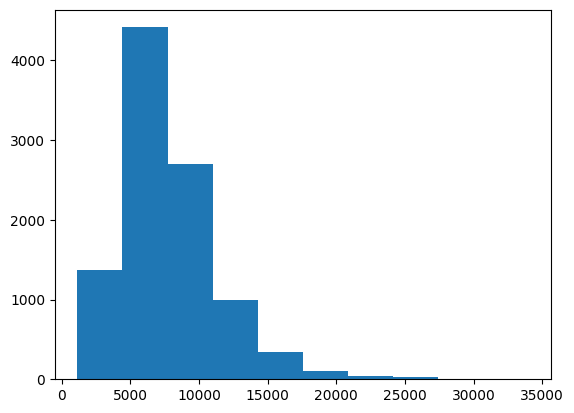

In [63]:
plt.hist(merged_df.Sales.sample(10000))

In [64]:
from xgboost import plot_tree
from matplotlib.pylab import rcParams


In [65]:
rcParams['figure.figsize'] = 30,30


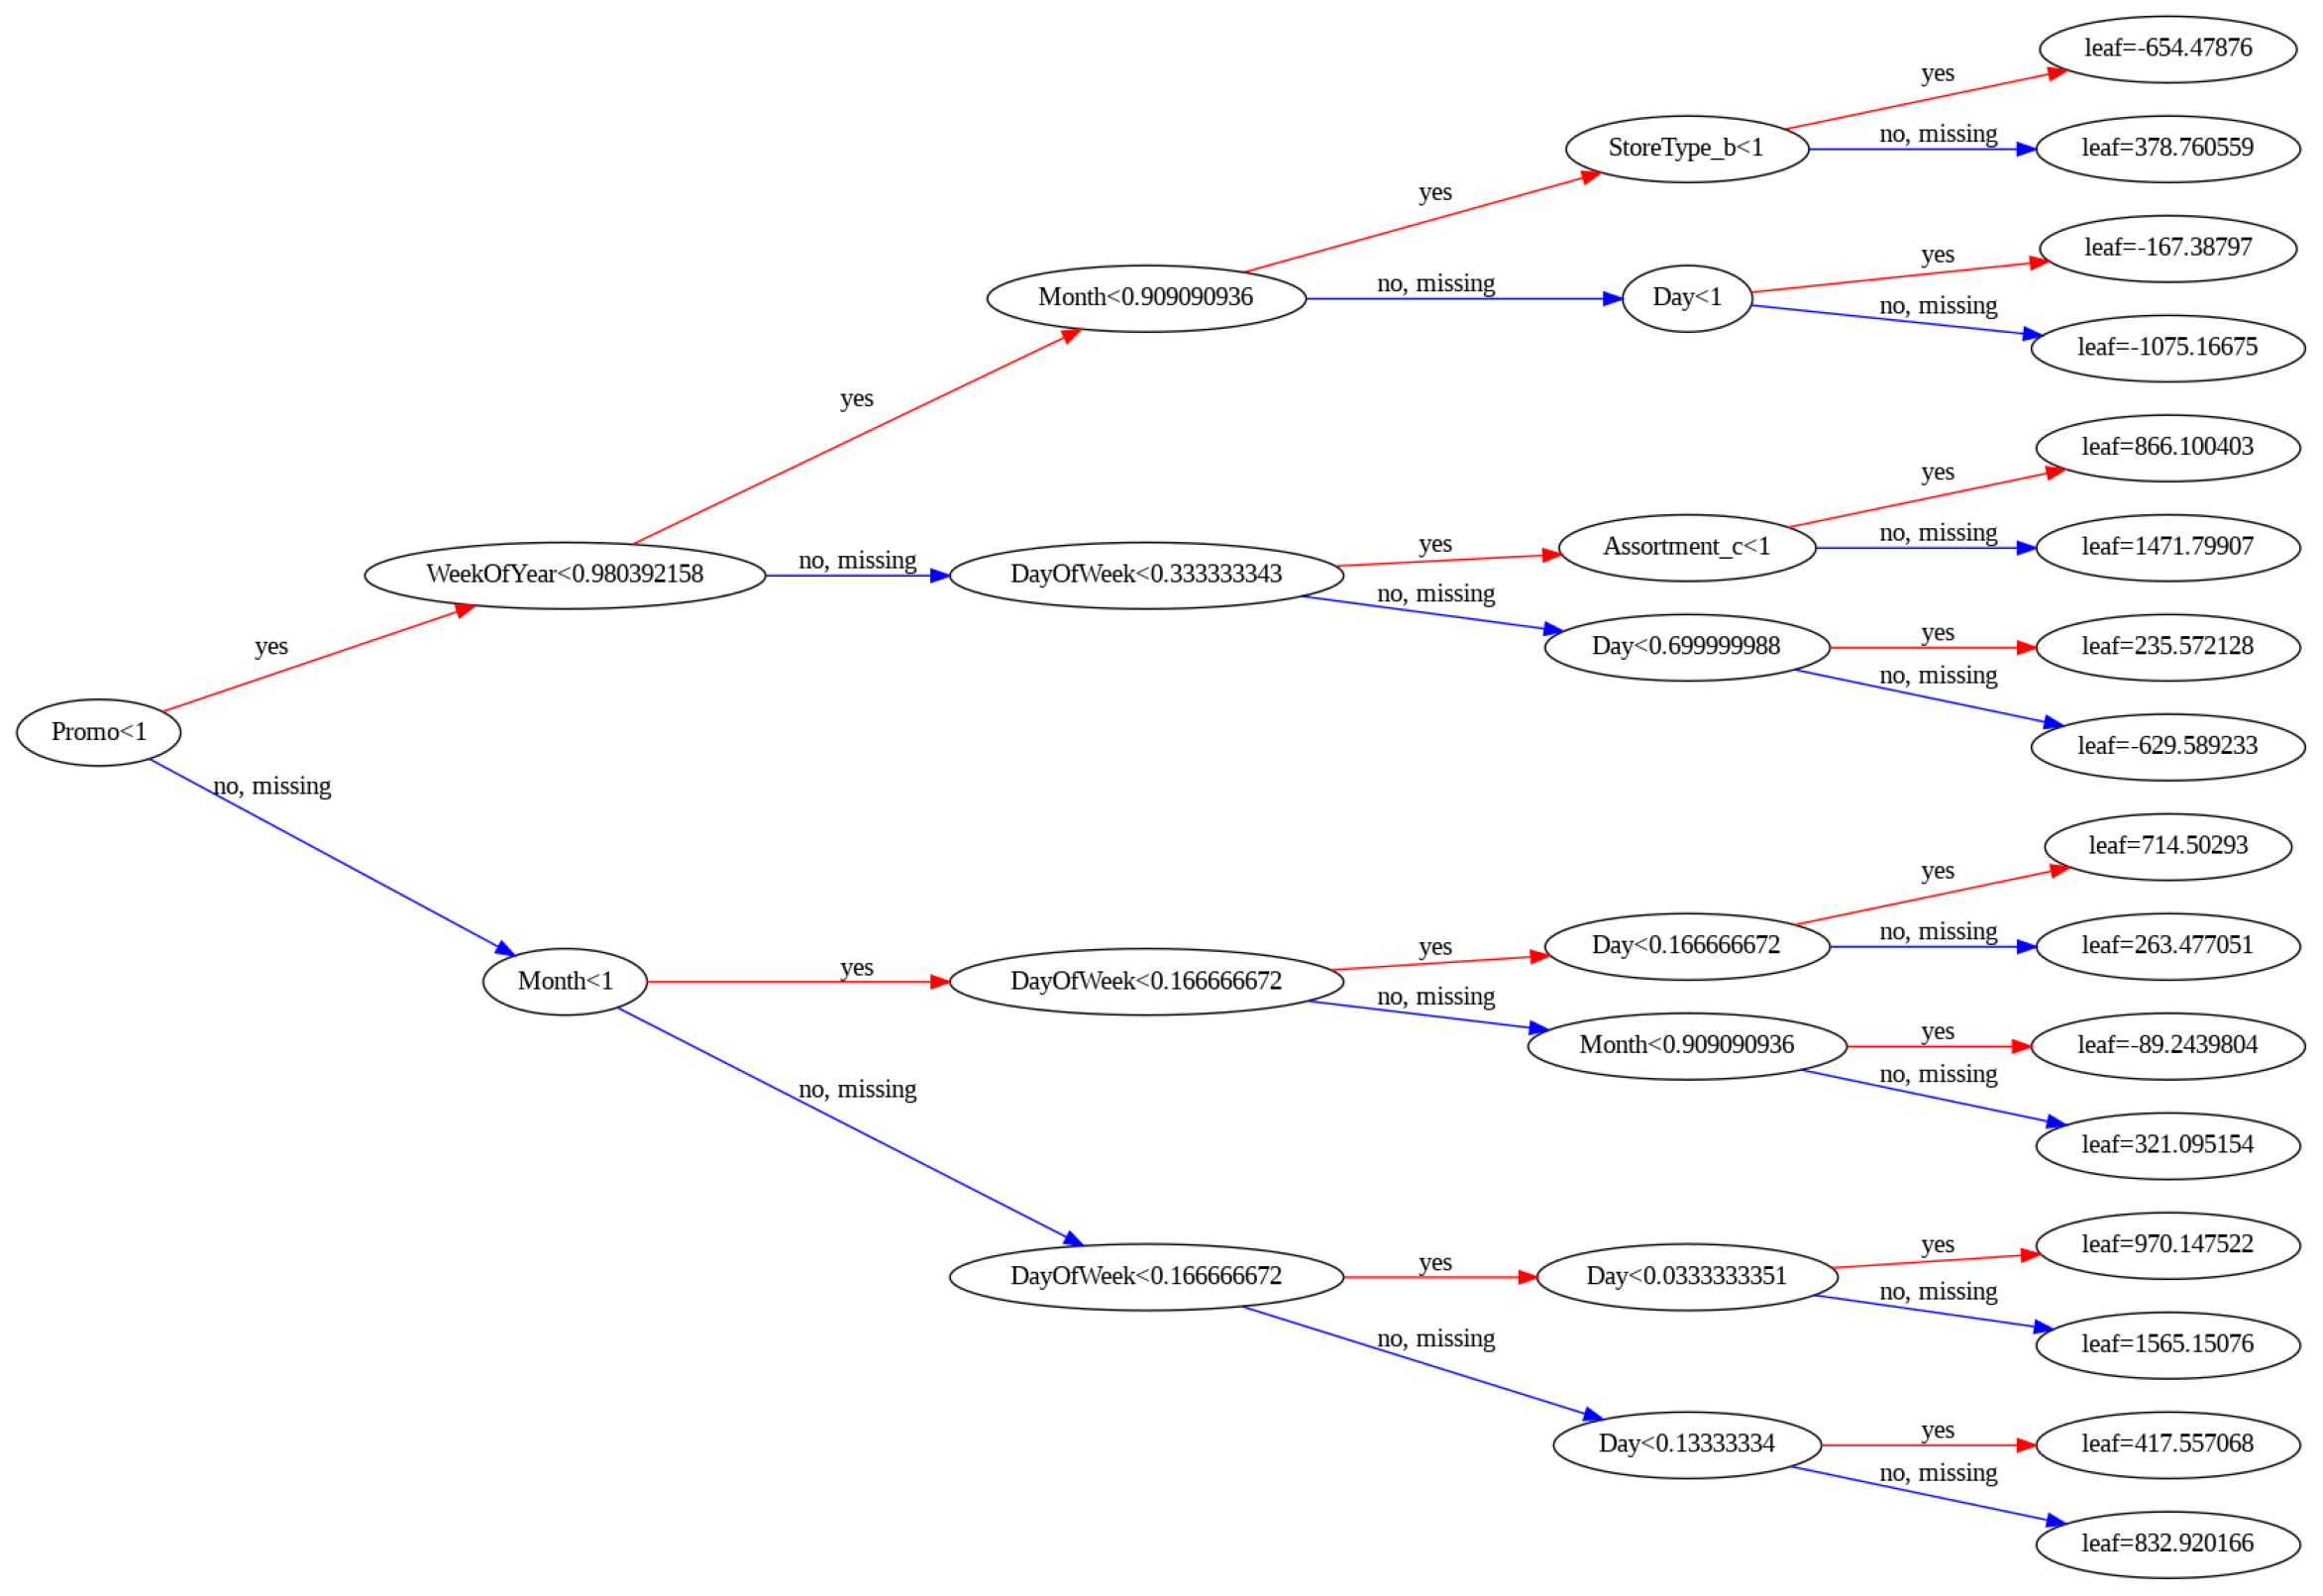

In [66]:
plot_tree(model, rankdir = 'LR');

/usr/local/lib/python3.12/dist-packages/xgboost/plotting.py:267: FutureWarning: The `num_trees` parameter is deprecated, use `tree_idx` insetad. 
  warnings.warn(


<Axes: >

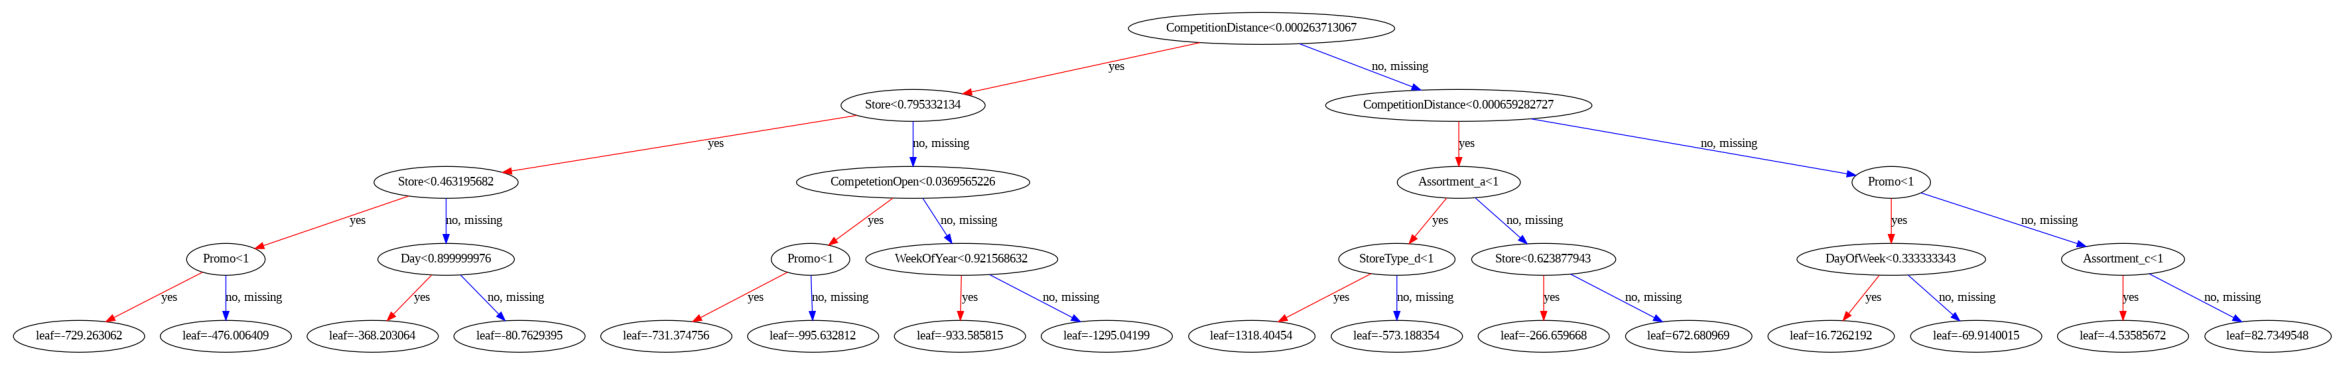

In [67]:
plot_tree(model, num_trees = 10)

### Model Retraining with more Estimators

In [68]:

from xgboost import XGBRegressor

In [69]:
model = XGBRegressor(random_state = 42, n_jobs = -1, n_estimators = 100 , max_depth = 4)

In [70]:
%%time
model.fit(x,targets)


CPU times: user 1.59 s, sys: 0 ns, total: 1.59 s
Wall time: 2.72 s


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=-1, num_parallel_tree=None, ...)

In [71]:
preds = model.predict(x)

In [72]:
preds

array([6622.619 , 7054.544 , 8190.9673, ..., 6771.828 , 8802.485 ,
       8508.892 ], dtype=float32)

In [73]:
from sklearn.metrics import mean_squared_error
import numpy as np

def rmse(a,b):
  return np.sqrt(mean_squared_error(a,b))

In [74]:
rmse(preds,targets)

np.float64(1721.2582606918695)

(array([1.664e+03, 4.625e+03, 2.524e+03, 8.360e+02, 2.370e+02, 6.500e+01,
        2.900e+01, 1.000e+01, 9.000e+00, 1.000e+00]),
 array([ 1126. ,  4655.1,  8184.2, 11713.3, 15242.4, 18771.5, 22300.6,
        25829.7, 29358.8, 32887.9, 36417. ]),
 <BarContainer object of 10 artists>)

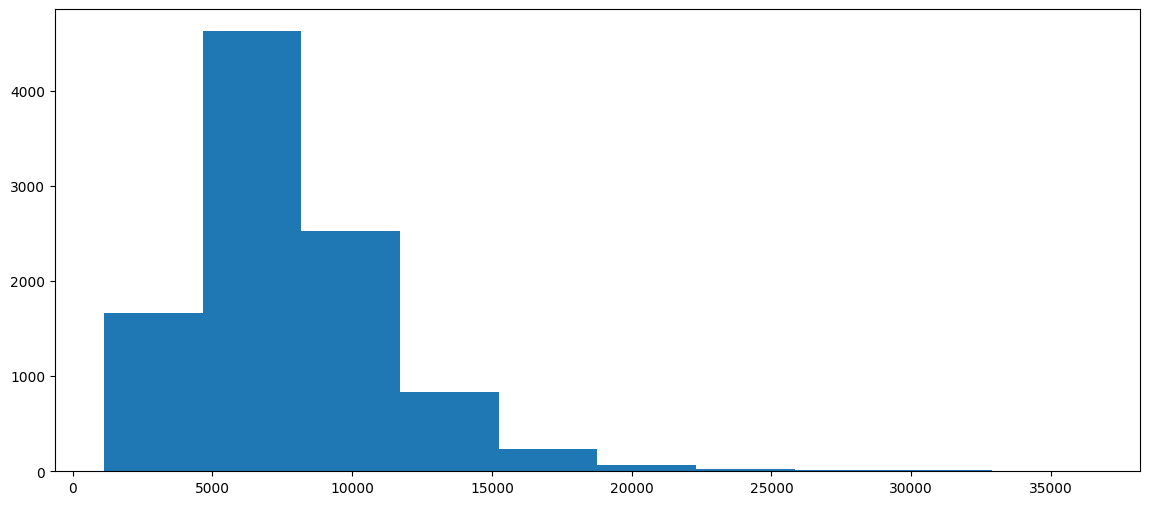

In [75]:
plt.figure(figsize = (14,6))
plt.hist(merged_df.Sales.sample(10000))

### Feature Importance Analysis

In [76]:
importance_df = pd.DataFrame({
    'Feature': x.columns,
    'Importance': model.feature_importances_
}).sort_values('Importance', ascending = False)

In [77]:
importance_df

,Feature,Importance
7,Month,0.288139
2,Promo,0.158211
17,StoreType_b,0.064782
1,DayOfWeek,0.058448
9,WeekOfYear,0.052360
20,Assortment_a,0.050468
19,StoreType_d,0.046279
6,Day,0.030671
4,CompetitionDistance,0.030145
10,Promo2,0.030094


<Axes: title={'center': 'Feature_importance'}, xlabel='Feature', ylabel='Importance'>

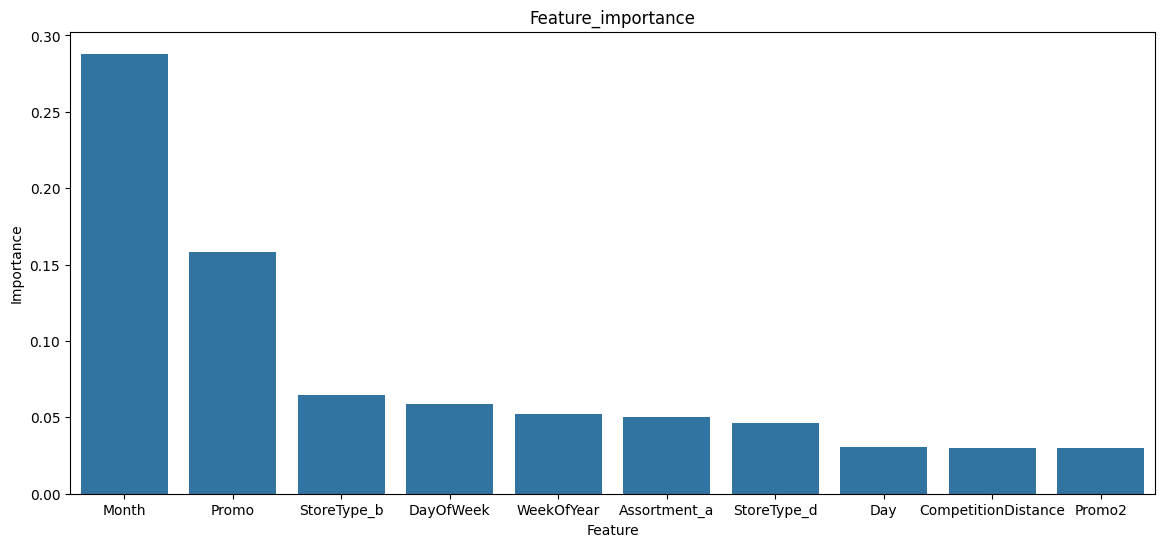

In [78]:
import seaborn as sns
plt.figure(figsize = (14,6))
plt.title('Feature_importance')
sns.barplot(x = 'Feature', y = 'Importance', data = importance_df.head(10))

### K-Fold Cross-Validation

In [79]:
from sklearn.model_selection import KFold

In [80]:
def train_and_evaluate(x_train, train_targets ,x_val, val_targets, **params):
  model = XGBRegressor(random_state = 42 , n_jobs =-1, **params)
  model.fit(x_train,train_targets)
  train_rmse = rmse(model.predict(x_train), train_targets)
  val_rmse = rmse(model.predict(x_val), val_targets)
  return model, train_rmse, val_rmse

In [81]:
kfold = KFold(n_splits = 5)

In [82]:
models = []

for train_idxs, val_idxs in kfold.split(x):
  x_train, train_targets = x.iloc[train_idxs], targets.iloc[train_idxs]
  x_val, val_targets = x.iloc[val_idxs], targets.iloc[val_idxs]
  model, train_rmse, val_rmse = train_and_evaluate(x_train, train_targets, x_val, val_targets, n_estimators = 1000, max_depth = 4)
  models.append(model)

  models.append(model)
  print(f'Train RMSE: {train_rmse:.4f}, Val RMSE: {val_rmse:.4f}')


Train RMSE: 884.8362, Val RMSE: 1117.5109
Train RMSE: 891.0152, Val RMSE: 1025.2673
Train RMSE: 776.9098, Val RMSE: 2440.9647
Train RMSE: 802.9148, Val RMSE: 2581.1349
Train RMSE: 855.4647, Val RMSE: 2101.7928


In [83]:
import numpy as np

def predict_avg(models, inputs):
  return np.mean([model.predict(inputs)for model in models], axis = 0)

In [84]:
%%time
preds = predict_avg(models, x)

CPU times: user 14.3 s, sys: 24 ms, total: 14.3 s
Wall time: 8.37 s


In [85]:
preds







array([6245.2837, 6231.7925, 7701.6133, ..., 7570.243 , 5224.464 ,
       9363.131 ], dtype=float32)

In [86]:
rmse(preds, targets)

np.float64(914.9907786420582)

In [87]:
from sklearn.model_selection import train_test_split

In [88]:
x_train, x_val, train_targets, val_targets = train_test_split(x, targets, test_size = 0.1, random_state=42)

In [89]:
def test_params(**params):
  model = XGBRegressor(random_state = 42, n_jobs =-1, **params)
  model.fit(x_train,train_targets)
  train_rmse = rmse(model.predict(x_train), train_targets)
  val_rmse = rmse(model.predict(x_val), val_targets)
  print('Train RMSE: {}, Validation RMSE: {}'.format(train_rmse ,val_rmse))

### Hyper parameter Tuning

In [90]:
test_params(n_estimators = 100)

Train RMSE: 1097.905335172391, Validation RMSE: 1203.5374422925113


In [91]:
test_params(n_estimators = 400)

Train RMSE: 658.1565400799418, Validation RMSE: 930.8088888166034


In [92]:
test_params(n_estimators = 600)

Train RMSE: 558.9241898504662, Validation RMSE: 900.8141803390974


In [93]:
test_params(n_estimators = 1000)

Train RMSE: 447.04444340020603, Validation RMSE: 879.2762648906202


In [94]:
%%time
test_params(n_estimators = 2000)

Train RMSE: 310.86729735129745, Validation RMSE: 873.8215278304832
CPU times: user 20.4 s, sys: 82.6 ms, total: 20.5 s
Wall time: 11.4 s


In [95]:
test_params(n_estimators = 3000)

Train RMSE: 238.25256589646625, Validation RMSE: 875.4106179388048


In [96]:
%%time
test_params(n_estimators = 5000)

Train RMSE: 157.43271752362975, Validation RMSE: 889.1758473440448
CPU times: user 51.8 s, sys: 254 ms, total: 52.1 s
Wall time: 30.3 s


max_depth

In [97]:
test_params(n_estimators = 3000 , max_depth = 10)

Train RMSE: 0.019730542095461868, Validation RMSE: 974.4526989546491


In [121]:
test_params(n_estimators = 2000 , max_depth = 6)

Train RMSE: 310.86729735129745, Validation RMSE: 873.8215278304832


Learning rate

In [99]:
test_params(n_estimators = 5000 , max_depth = 10, learning_rate = 0.5)

Train RMSE: 0.0022117824173495367, Validation RMSE: 1053.2241570529989


In [100]:
test_params(n_estimators = 5000 , max_depth = 10, learning_rate = 0.6)

Train RMSE: 0.0025612838235344127, Validation RMSE: 1098.009619721066


In [101]:
test_params(n_estimators = 5000, max_depth = 10, learning_rate = 0.7)

Train RMSE: 0.0018461288037630666, Validation RMSE: 1154.9623911625868


In [102]:
test_params(n_estimators = 5000 , max_depth = 10, learning_rate = 0.8)

Train RMSE: 0.0014444564773429282, Validation RMSE: 1184.2854385662267


In [143]:
test_params(n_estimators = 2000, max_depth = 6, learning_rate = 0.25 )

Train RMSE: 343.0298023678118, Validation RMSE: 847.4309337639263


### Final model Training and submission

In [140]:
model = XGBRegressor(random_state = 42, n_jobs = -1, n_estimators = 2000, max_depth = 6, learning_rate = 0.25)

In [141]:
train_preds = model.fit(x_train, train_targets)

In [144]:
val_preds = model.predict(x_val)

In [145]:
test_preds = model.predict(x_test)

In [149]:
submission_df = submission_df[:33450]

In [150]:
submission_df

,Id,Sales
0,1,1
1,2,1
2,3,1
3,4,1
4,5,1
...,...,...
33445,33446,1
33446,33447,1
33447,33448,1
33448,33449,1


In [146]:
submission_df = pd.read_csv('/content/sample_submission.csv')

In [151]:
submission_df

,Id,Sales
0,1,1
1,2,1
2,3,1
3,4,1
4,5,1
...,...,...
33445,33446,1
33446,33447,1
33447,33448,1
33448,33449,1


In [152]:
 submission_df['Sales'] = test_preds

/tmp/ipython-input-1844322741.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  submission_df['Sales'] = test_preds


In [153]:
submission_df['Sales'] = np.where(merged_test_df['Open'] == 0, 0, submission_df['Sales'])

/tmp/ipython-input-3326018553.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  submission_df['Sales'] = np.where(merged_test_df['Open'] == 0, 0, submission_df['Sales'])


In [158]:
submission_df

,Id,Sales
0,1,5513.160645
1,2,5855.859375
2,3,7198.357422
3,4,13220.382812
4,5,6503.140137
...,...,...
33445,33446,4900.891113
33446,33447,9200.051758
33447,33448,7863.977539
33448,33449,19982.824219


In [154]:
submission_df.to_csv('submission.csv', index = False)

### saving the model

In [155]:
import joblib


In [156]:
Rossmann = {
    'model': model,
    'scaler': scaler,
    'encoder': encoder,
    'input_cols': input_cols,
    'target_cols': target_cols,
    'numeric_cols': numeric_cols,
    'categorical_cols': categorical_cols,
    'max_distance': max_distance,
    'test_inputs': test_inputs,
}


In [157]:
joblib.dump(Rossmann, 'Rossmann.joblib')

['Rossmann.joblib']